Here we use another table from a paper in 2011

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy import interpolate

In [2]:
#let's consider the atmoshperic parameters for our target:
# (random values...) 
star_teff = [6350., 50]
star_logg = [4.25, 0.04] 
star_gfeh = [0.00, 0.05] 


phot_band = 'r*'

In [3]:
#https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/529/A75#/browse
#https://cdsarc.cds.unistra.fr/ftp/J/A+A/529/A75/ReadMe
#Byte-by-byte Description of file: tableab.dat
#--------------------------------------------------------------------------------
#   Bytes Format Units   Label    Explanations
#--------------------------------------------------------------------------------
#   1-  5  F5.2  [cm/s2] logg     [0/5] Surface gravity
#   7- 12  F6.0  K       Teff     [2000/50000] Effective temperature
#  14- 17  F4.1  [Sun]   Z        [-5/1] Metallicity (log[M/H])
#  19- 22  F4.1  km/s    xi       [0/8] Microturbulent velocity
#  24- 30  F7.4  ---     a        Quadratic limb darkening coefficient a (G2)
#  32- 38  F7.4  ---     b        Quadratic limb darkening coefficient b (G2)
#  40- 41  A2    ---     Filt     Filter (G1)
#      43  A1    ---     Met      [LF] Method (Least-Square or Flux Conservation)
#  45- 51  A7    ---     Mod      Model (ATLAS or PHOENIX)
#--------------------------------------------------------------------------------

tableab = np.genfromtxt('Claret2011_tableab.dat',dtype=np.double)
tableab_string = np.genfromtxt('Claret2011_tableab.dat',dtype=str)

# Claret 2011 - ATLAS, Least Square, with gravity interpolation

Selected first  gravity value from the table:  4.0
Selected second gravity value from the table:  4.5
gfeh:  [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
Teff:  [4250. 4500. 4750. 5000. 5250. 5500. 5750. 6000. 6250. 6500.]
LD c1: [0.022  0.0729 0.1622 0.2351 0.2591 0.264  0.2752 0.2834 0.2835 0.2827]
LD c2: [0.4541 0.452  0.4191 0.3766 0.3594 0.3503 0.3362 0.3232 0.3159 0.3093]

gfeh # values:  19
teff # values:  65
array size:  1037
19 x 65 = 1037

gfeh # values:  19
teff # values:  75
array size:  1083
19 x 75 = 1083

gfeh coordinates (array):  [-1.  -0.5 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.5  1. ]
Teff coordinates (array):  [3500. 3750. 4000. 4250. 4500. 4750. 5000. 5250. 5500. 5750. 6000. 6250.
 6500. 6750. 7000. 7250. 7500. 7750. 8000. 8250. 8500. 8750. 9000. 9250.]
Matrix shape:  (11, 24)


<IPython.core.display.Javascript object>


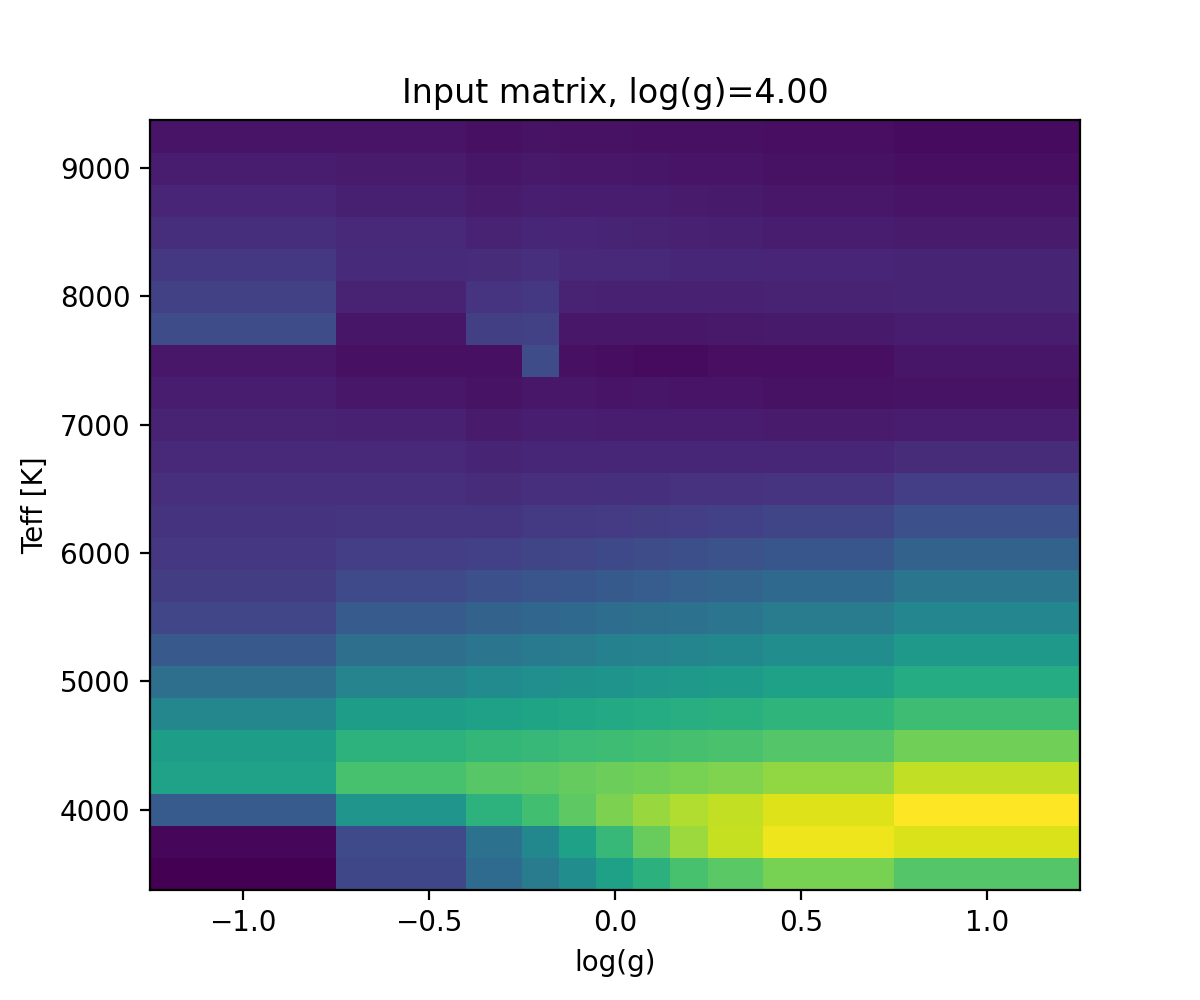

<IPython.core.display.Javascript object>


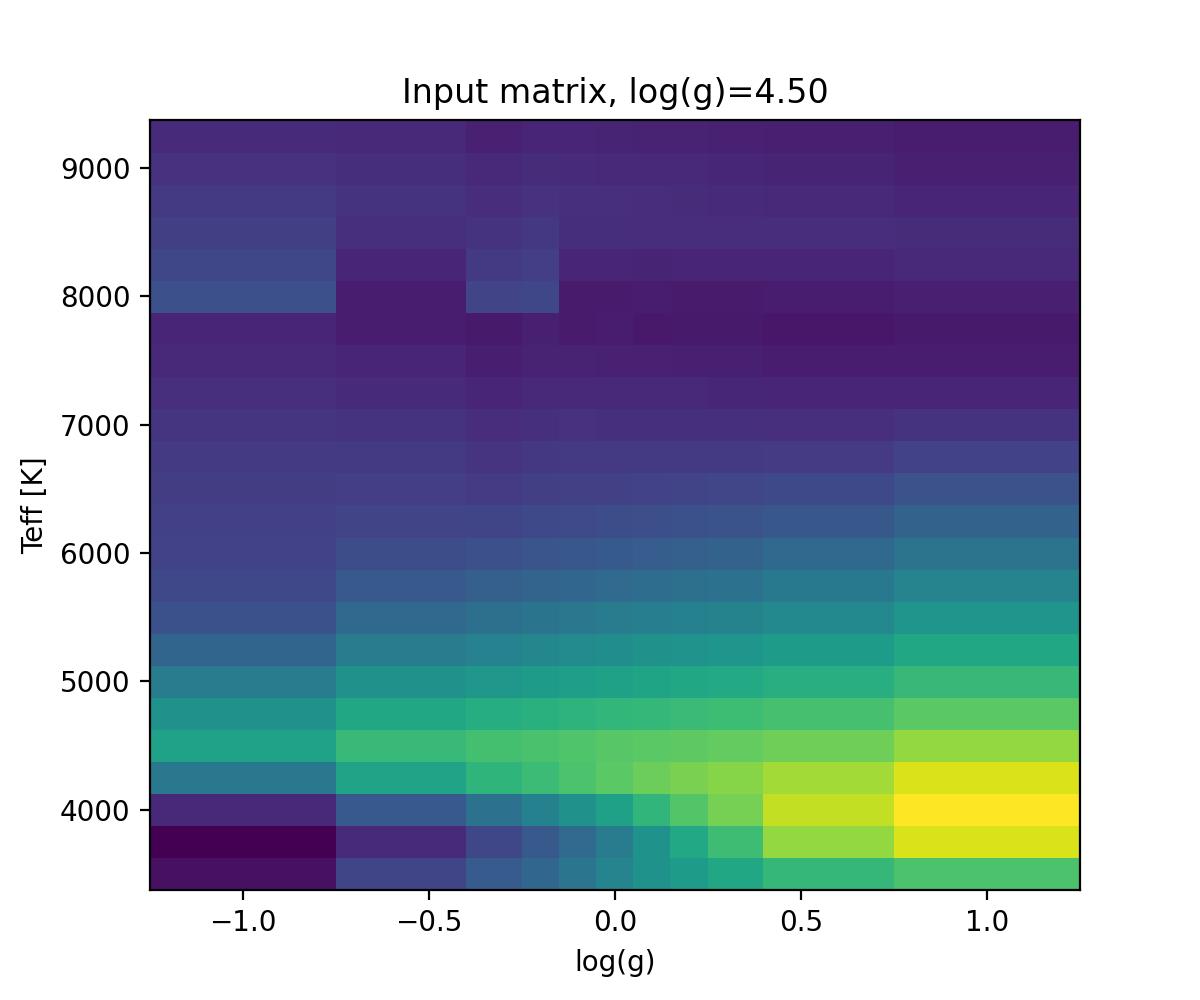

Selected first  gravity value from the table:  4.0
Selected second gravity value from the table:  4.5
Stellar gravity :  4.25


<IPython.core.display.Javascript object>


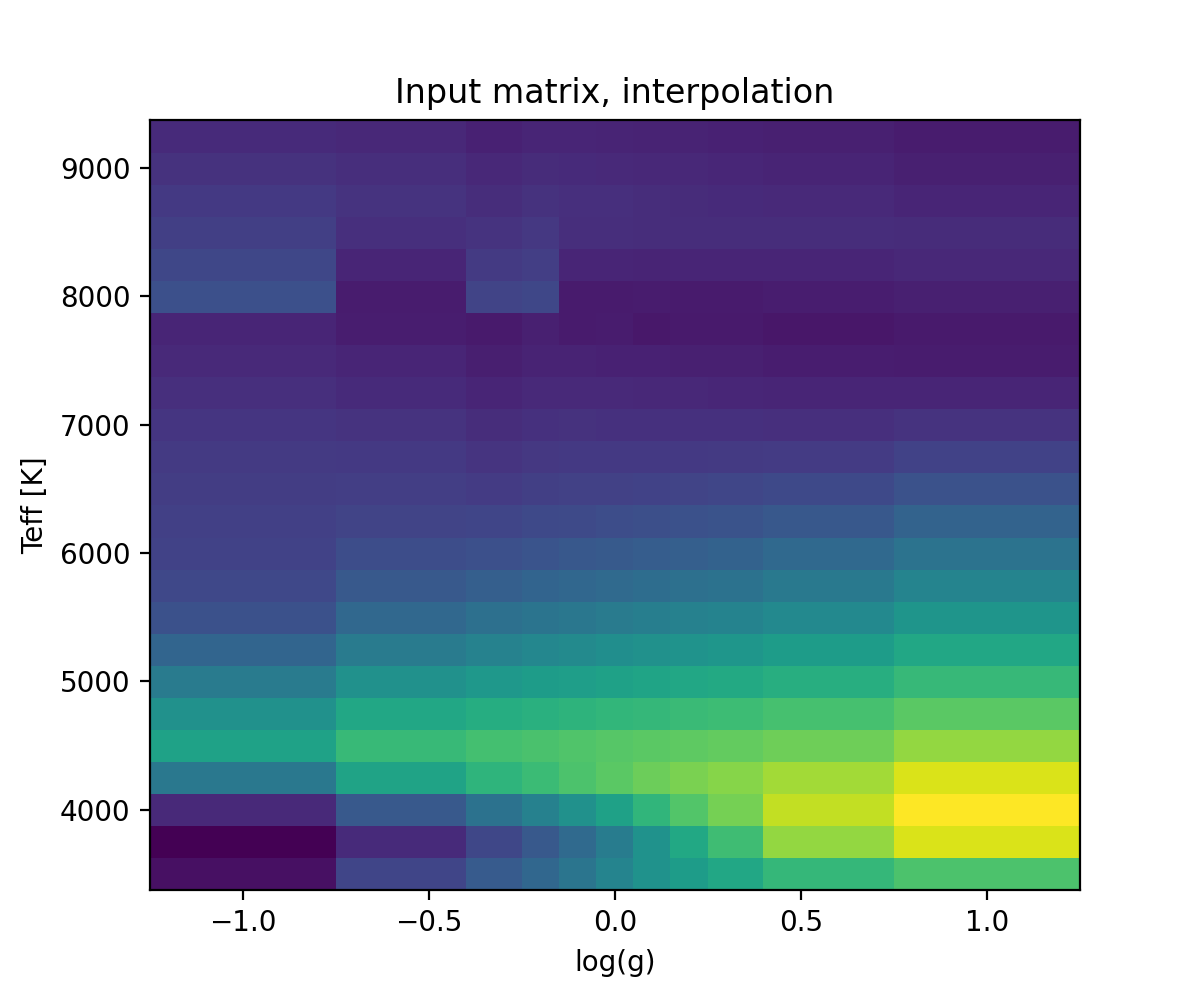

<IPython.core.display.Javascript object>


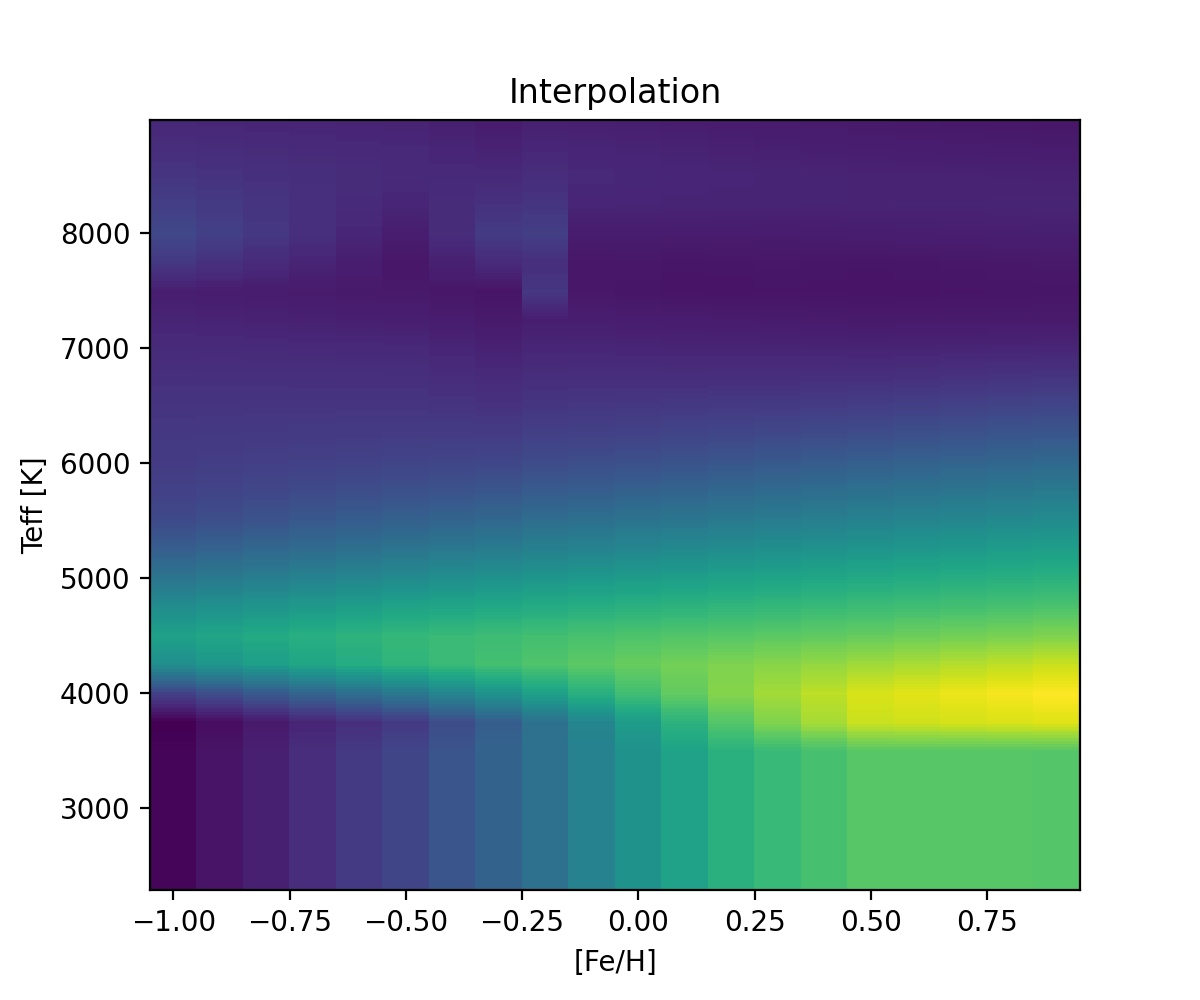

In [4]:
delta_loggv1 = star_logg[0] - 0.25
delta_loggv2 = star_logg[0] + 0.25

# pick the closest value to gravity - lower side
loggv1_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv1))
print('Selected first  gravity value from the table: ', tableab[loggv1_ind,0])
loggv1_sel = (tableab[:,0] == tableab[loggv1_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'L') \
    & (tableab_string[:,8] == 'ATLAS') 
# we also select microturbulence == 2.0

# pick the closest value to gravity - upper side
loggv2_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv2))
print('Selected second gravity value from the table: ', tableab[loggv2_ind,0])
loggv2_sel = (tableab[:,0] == tableab[loggv2_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'L') \
    & (tableab_string[:,8] == 'ATLAS') 

teff_loggv1 = tableab[loggv1_sel,1]
gfeh_loggv1 = tableab[loggv1_sel,2]
ld_c1_loggv1 = tableab[loggv1_sel,4]
ld_c2_loggv1 = tableab[loggv1_sel,5]

teff_loggv2 = tableab[loggv2_sel,1]
gfeh_loggv2 = tableab[loggv2_sel,2]
ld_c1_loggv2 = tableab[loggv2_sel,4]
ld_c2_loggv2 = tableab[loggv2_sel,5]

# let's print a bunch of numbers
print('gfeh: ',gfeh_loggv1[:10])
print('Teff: ',teff_loggv1[:10])
print('LD c1:',ld_c1_loggv1[:10])
print('LD c2:',ld_c2_loggv1[:10])

print()
print('gfeh # values: ',len(gfeh_loggv1[teff_loggv1==6000.]))
print('teff # values: ',len(teff_loggv1[gfeh_loggv1==0.0]))
print('array size: ',len(gfeh_loggv1))
print('{0:.0f} x {1:.0f} = {2:.0f}'.format(len(gfeh_loggv1[teff_loggv1==6000.]), len(teff_loggv1[gfeh_loggv1==0.0]), len(gfeh_loggv1)))

print()
print('gfeh # values: ',len(gfeh_loggv2[teff_loggv2==6000.]))
print('teff # values: ',len(teff_loggv2[gfeh_loggv2==0.0]))
print('array size: ',len(gfeh_loggv2))
print('{0:.0f} x {1:.0f} = {2:.0f}'.format(len(gfeh_loggv2[teff_loggv2==6000.]), len(teff_loggv2[gfeh_loggv2==0.0]), len(gfeh_loggv2)))


# We have three columns that we have to convert to a 2D grid - x, y ,z 
# Fortunately, the file is well formatted - we have a total of 8 values 
# for log(g) for each of 72 values for temperature

# 2.50  2300.  0.0  2.0   0.3720   0.5002   0.1220   0.1678 PC TESS
# 3.00  2300.  0.0  2.0   0.3825   0.4852   0.0849   0.1785 PC TESS
# 3.50  2300.  0.0  2.0   0.4348   0.4310   0.0663   0.1413 PC TESS
# 4.00  2300.  0.0  2.0   0.4840   0.3958   0.0502   0.1122 PC TESS

print()

# avoid extreme gravities and temperatures
sel_gfeh = (teff_loggv1==6000) & (gfeh_loggv1 > -1.5)
sel_teff = (gfeh_loggv1==0.0) & (teff_loggv1 < 9500.0)

gfeh_array_logg = gfeh_loggv1[sel_gfeh]
print('gfeh coordinates (array): ',gfeh_array_logg)
teff_array_logg = teff_loggv1[sel_teff]
print('Teff coordinates (array): ',teff_array_logg)




# we create a 2D grid with size (len(gfeh_array) x len(teff_array))
# for each LD coefficient and for each gravity value

c1_matrix_logg_v1 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))
c2_matrix_logg_v1 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))

c1_matrix_logg_v2 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))
c2_matrix_logg_v2 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))


print('Matrix shape: ',np.shape(c1_matrix_logg_v1))

for gfeh_i, gfeh_v in enumerate(gfeh_array_logg):
    for teff_i, teff_v in enumerate(teff_array_logg):
        
        # identify the row corresponding to a given combination of gravity and tempearture 
        sel = (gfeh_loggv1 == gfeh_v) & (teff_loggv1 == teff_v)
        
        if np.sum(sel) == 1:
            c1_matrix_logg_v1[gfeh_i, teff_i] = ld_c1_loggv1[sel]
            c2_matrix_logg_v1[gfeh_i, teff_i] = ld_c2_loggv1[sel]
        else:
            print('No value for (gfeh,teff)=({0:f},{1:f})'.format(gfeh_v,teff_v))
            print(np.sum(sel))
            c1_matrix_logg_v1[gfeh_i, teff_i] = (c1_matrix_logg_v1[gfeh_i, teff_i-1] + c1_matrix_logg_v1[gfeh_i, teff_i+1])/2
            c2_matrix_logg_v1[gfeh_i, teff_i] = (c2_matrix_logg_v1[gfeh_i, teff_i-1] + c2_matrix_logg_v1[gfeh_i, teff_i+1])/2
            # replacing this combination with average values


        # identify the row corresponding to a given combination of gravity and tempearture 
        sel = (gfeh_loggv2 == gfeh_v) & (teff_loggv2 == teff_v)
        
        if np.sum(sel) == 1:
            c1_matrix_logg_v2[gfeh_i, teff_i] = ld_c1_loggv2[sel]
            c2_matrix_logg_v2[gfeh_i, teff_i] = ld_c2_loggv2[sel]
        else:
            print('No value for (gfeh,teff)=({0:f},{1:f})'.format(gfeh_v,teff_v))
            print(np.sum(sel))
            c1_matrix_logg_v2[gfeh_i, teff_i] = (c1_matrix_logg_v2[gfeh_i, teff_i-1] + c1_matrix_logg_v2[gfeh_i, teff_i+1])/2
            c2_matrix_logg_v2[gfeh_i, teff_i] = (c2_matrix_logg_v2[gfeh_i, teff_i-1] + c2_matrix_logg_v2[gfeh_i, teff_i+1])/2
            # replacing this combination with average values

            
            
            

# Le't see the actual matrix 
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v1.T, shading='auto')
plt.title('Input matrix, log(g)={0:4.2f}'.format(tableab[loggv1_ind,0]))
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()


# Le't see the actual matrix
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v2.T, shading='auto')
plt.title('Input matrix, log(g)={0:4.2f}'.format(tableab[loggv2_ind,0]))
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()


#Linear interpolation between the two matrix

logg_v1 = tableab[loggv1_ind,0]
logg_v2 = tableab[loggv2_ind,0]

print('Selected first  gravity value from the table: ', logg_v1)
print('Selected second gravity value from the table: ', logg_v2)
print('Stellar gravity : ', star_logg[0])


# y = (y0*(x1-x) + y1*(x-x0))/(x1-x0)
 
c1_matrix_atlas_ls = (c1_matrix_logg_v1 * (logg_v2-star_logg[0]) + c1_matrix_logg_v2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)
c2_matrix_atlas_ls = (c2_matrix_logg_v1 * (logg_v2-star_logg[0]) + c2_matrix_logg_v2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)


# Le't see the "real" matrix
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v2.T, shading='auto')
plt.title('Input matrix, interpolation')
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()

# bilinear_interpolation usci Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html

# Note: if len(gfeh_array)=m and len(teff_array)=n, the third array must be n*m 
c1_function_atlas_ls = interpolate.interp2d(gfeh_array_logg, teff_array_logg, c1_matrix_atlas_ls.T, kind='linear')
c2_function_atlas_ls = interpolate.interp2d(gfeh_array_logg, teff_array_logg, c2_matrix_atlas_ls.T, kind='linear')

teff_grid = np.arange(2300, 9000, 25)
gfeh_grid = np.arange(-1.0, 1.0, 0.1)

xx, yy = np.meshgrid(gfeh_grid,teff_grid)
c1_plot_out = c1_function_atlas_ls(gfeh_grid, teff_grid)

plt.figure(figsize=(6,5))
plt.pcolor(xx,yy, c1_plot_out, shading='auto')
plt.title('Interpolation')
plt.xlabel('[Fe/H]')
plt.ylabel('Teff [K]')
plt.show()


# Claret 2011 - ATLAS, Flux conservation, with gravity interpolation

Selected first  gravity value from the table:  4.0
Selected second gravity value from the table:  4.5
gfeh:  [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
Teff:  [4250. 4500. 4750. 5000. 5250. 5500. 5750. 6000. 6250. 6500.]
LD c1: [0.0863 0.1364 0.2174 0.277  0.2981 0.3014 0.309  0.3143 0.3131 0.3113]
LD c2: [0.3715 0.3697 0.347  0.3217 0.3082 0.301  0.2916 0.2825 0.2769 0.2717]

gfeh # values:  19
teff # values:  65
array size:  1037
19 x 65 = 1037

gfeh # values:  19
teff # values:  75
array size:  1083
19 x 75 = 1083

gfeh coordinates (array):  [-1.  -0.5 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.5  1. ]
Teff coordinates (array):  [3500. 3750. 4000. 4250. 4500. 4750. 5000. 5250. 5500. 5750. 6000. 6250.
 6500. 6750. 7000. 7250. 7500. 7750. 8000. 8250. 8500. 8750. 9000. 9250.]
Matrix shape:  (11, 24)


<IPython.core.display.Javascript object>


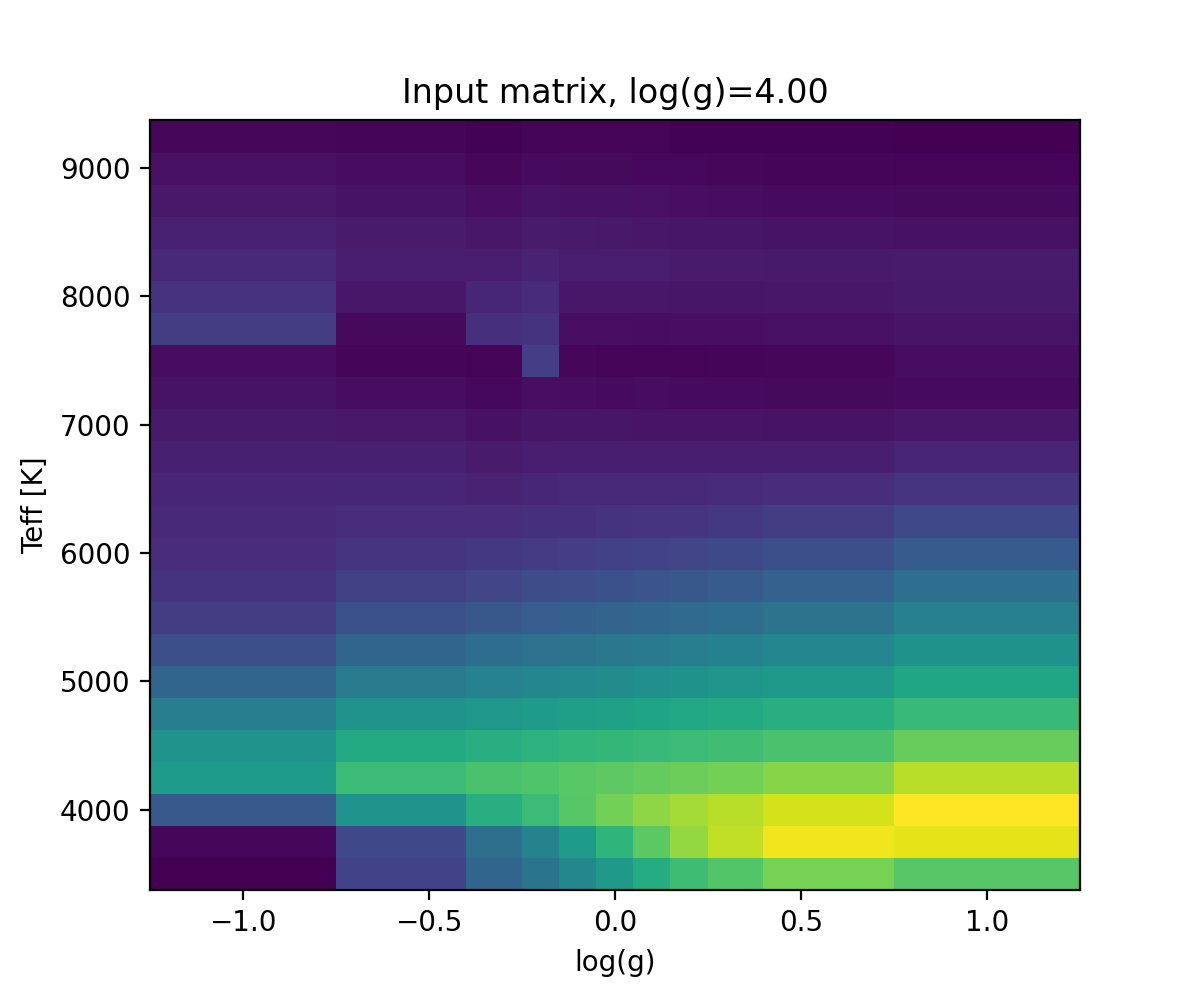

<IPython.core.display.Javascript object>


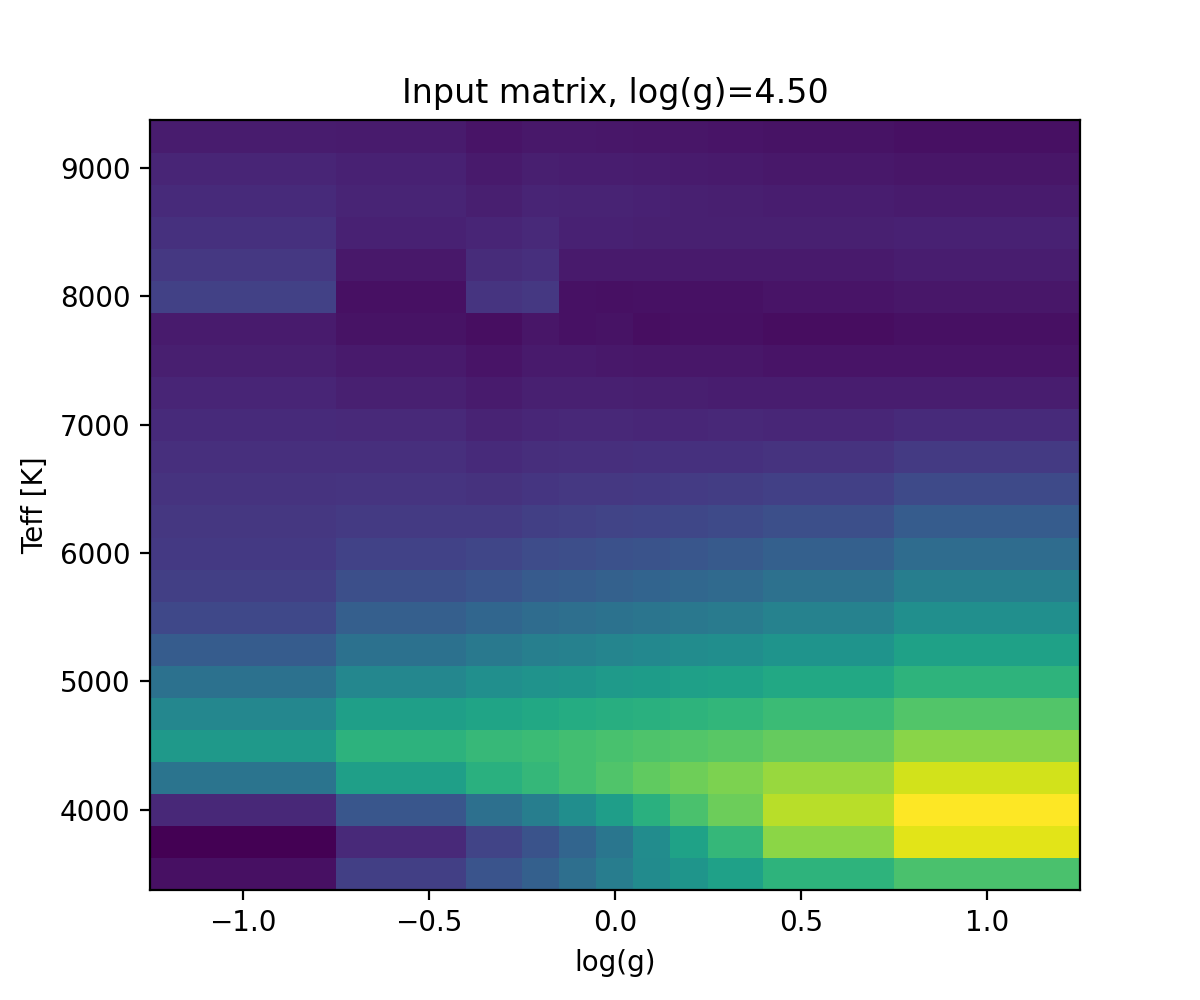

Selected first  gravity value from the table:  4.0
Selected second gravity value from the table:  4.5
Stellar gravity :  4.25


<IPython.core.display.Javascript object>


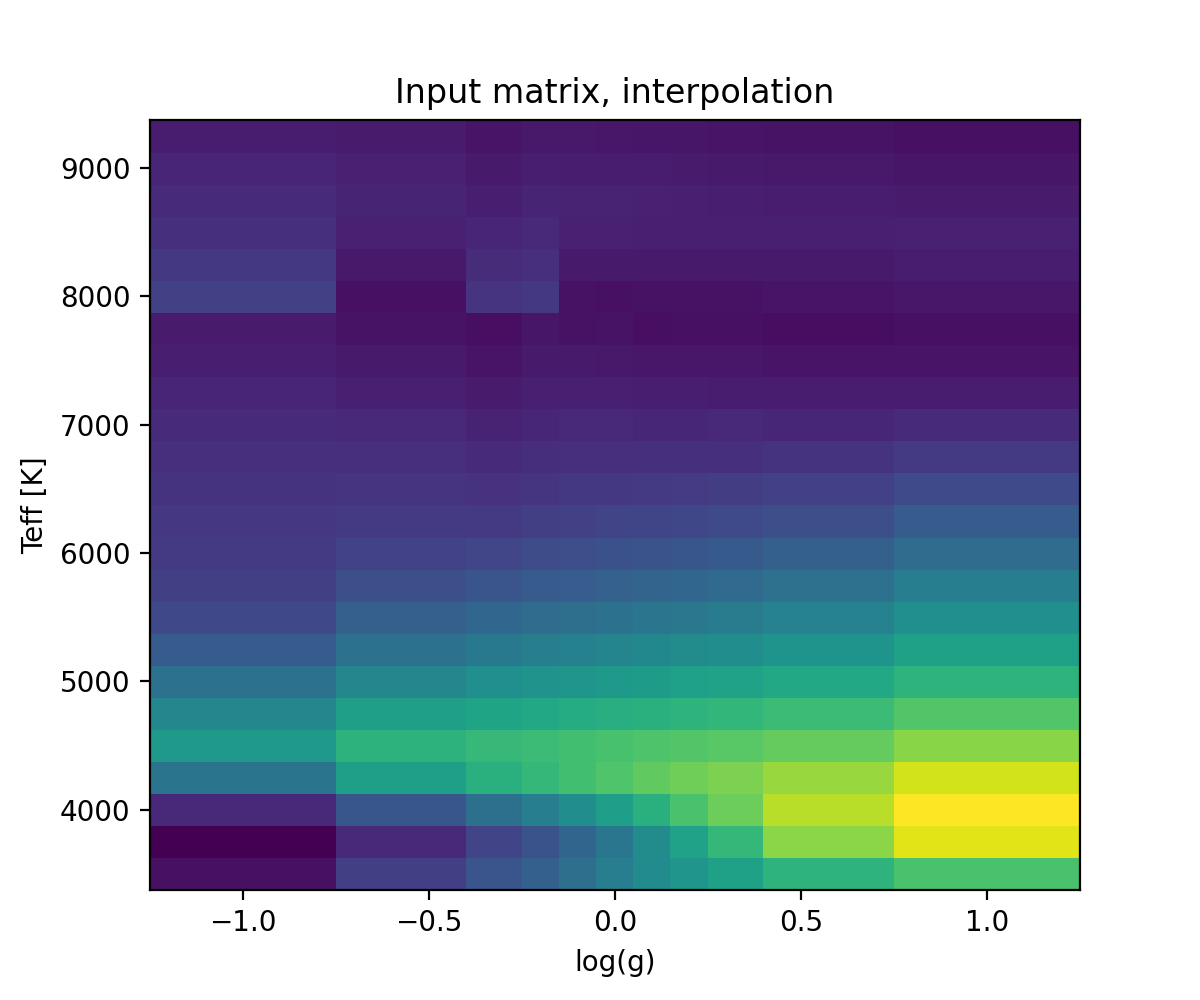

<IPython.core.display.Javascript object>


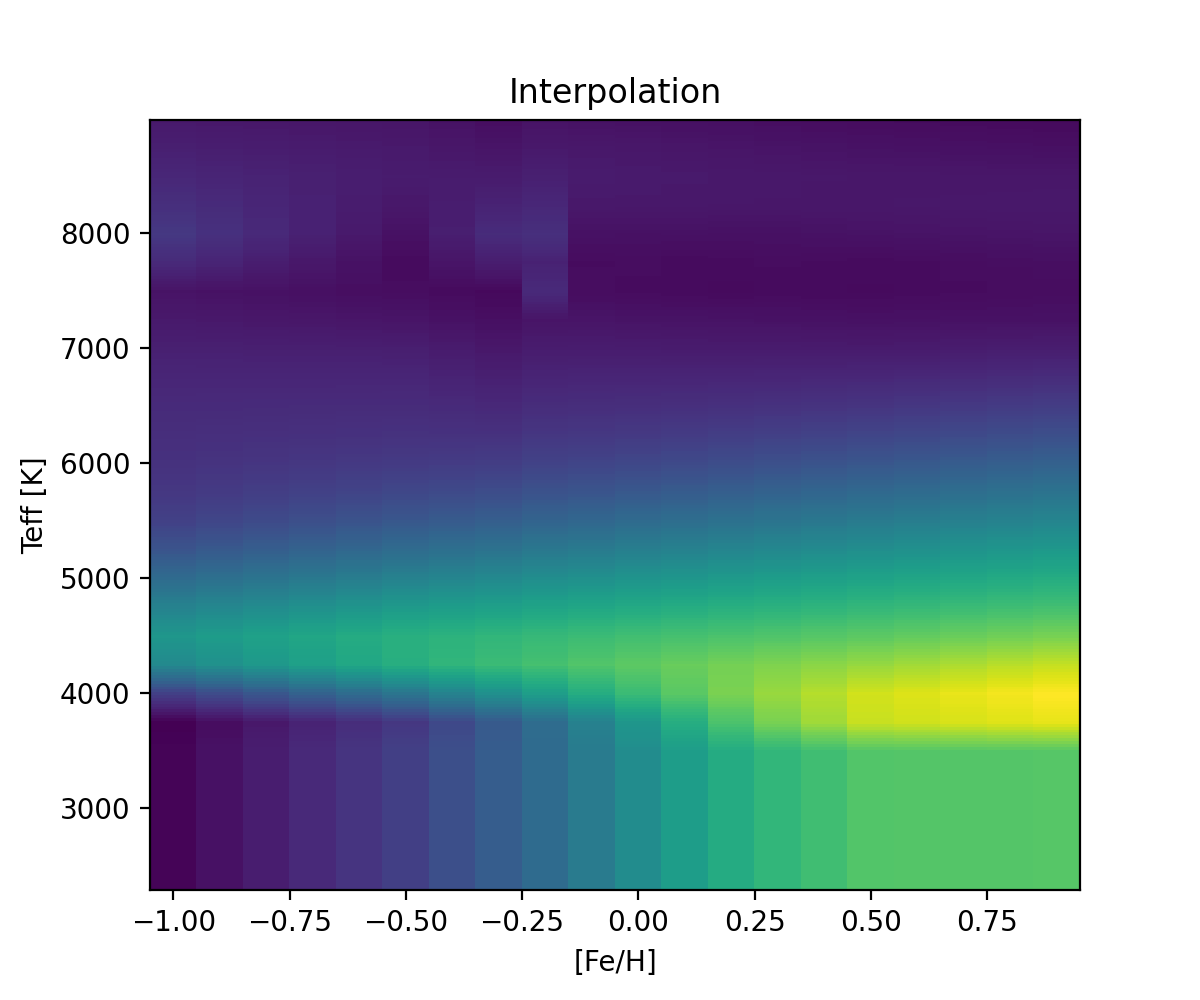

In [5]:


delta_loggv1 = star_logg[0] - 0.25
delta_loggv2 = star_logg[0] + 0.25

# pick the closest value to gravity - lower side
loggv1_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv1))
print('Selected first  gravity value from the table: ', tableab[loggv1_ind,0])
loggv1_sel = (tableab[:,0] == tableab[loggv1_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'F') \
    & (tableab_string[:,8] == 'ATLAS') 
# we also select microturbulence == 2.0

# pick the closest value to gravity - upper side
loggv2_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv2))
print('Selected second gravity value from the table: ', tableab[loggv2_ind,0])
loggv2_sel = (tableab[:,0] == tableab[loggv2_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'F') \
    & (tableab_string[:,8] == 'ATLAS') 

teff_loggv1 = tableab[loggv1_sel,1]
gfeh_loggv1 = tableab[loggv1_sel,2]
ld_c1_loggv1 = tableab[loggv1_sel,4]
ld_c2_loggv1 = tableab[loggv1_sel,5]

teff_loggv2 = tableab[loggv2_sel,1]
gfeh_loggv2 = tableab[loggv2_sel,2]
ld_c1_loggv2 = tableab[loggv2_sel,4]
ld_c2_loggv2 = tableab[loggv2_sel,5]

# let's print a bunch of numbers
print('gfeh: ',gfeh_loggv1[:10])
print('Teff: ',teff_loggv1[:10])
print('LD c1:',ld_c1_loggv1[:10])
print('LD c2:',ld_c2_loggv1[:10])

print()
print('gfeh # values: ',len(gfeh_loggv1[teff_loggv1==6000.]))
print('teff # values: ',len(teff_loggv1[gfeh_loggv1==0.0]))
print('array size: ',len(gfeh_loggv1))
print('{0:.0f} x {1:.0f} = {2:.0f}'.format(len(gfeh_loggv1[teff_loggv1==6000.]), len(teff_loggv1[gfeh_loggv1==0.0]), len(gfeh_loggv1)))

print()
print('gfeh # values: ',len(gfeh_loggv2[teff_loggv2==6000.]))
print('teff # values: ',len(teff_loggv2[gfeh_loggv2==0.0]))
print('array size: ',len(gfeh_loggv2))
print('{0:.0f} x {1:.0f} = {2:.0f}'.format(len(gfeh_loggv2[teff_loggv2==6000.]), len(teff_loggv2[gfeh_loggv2==0.0]), len(gfeh_loggv2)))


# We have three columns that we have to convert to a 2D grid - x, y ,z 
# Fortunately, the file is well formatted - we have a total of 8 values 
# for log(g) for each of 72 values for temperature

# 2.50  2300.  0.0  2.0   0.3720   0.5002   0.1220   0.1678 PC TESS
# 3.00  2300.  0.0  2.0   0.3825   0.4852   0.0849   0.1785 PC TESS
# 3.50  2300.  0.0  2.0   0.4348   0.4310   0.0663   0.1413 PC TESS
# 4.00  2300.  0.0  2.0   0.4840   0.3958   0.0502   0.1122 PC TESS

print()

# avoid extreme gravities and temperatures
sel_gfeh = (teff_loggv1==6000) & (gfeh_loggv1 > -1.5)
sel_teff = (gfeh_loggv1==0.0) & (teff_loggv1 < 9500.0)

gfeh_array_logg = gfeh_loggv1[sel_gfeh]
print('gfeh coordinates (array): ',gfeh_array_logg)
teff_array_logg = teff_loggv1[sel_teff]
print('Teff coordinates (array): ',teff_array_logg)



# we create a 2D grid with size (len(gfeh_array) x len(teff_array))
# for each LD coefficient and for each gravity value

c1_matrix_logg_v1 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))
c2_matrix_logg_v1 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))

c1_matrix_logg_v2 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))
c2_matrix_logg_v2 = np.zeros((len(gfeh_array_logg), len(teff_array_logg)))


print('Matrix shape: ',np.shape(c1_matrix_logg_v1))

for gfeh_i, gfeh_v in enumerate(gfeh_array_logg):
    for teff_i, teff_v in enumerate(teff_array_logg):
        
        # identify the row corresponding to a given combination of gravity and tempearture 
        sel = (gfeh_loggv1 == gfeh_v) & (teff_loggv1 == teff_v)
        
        if np.sum(sel) == 1:
            c1_matrix_logg_v1[gfeh_i, teff_i] = ld_c1_loggv1[sel]
            c2_matrix_logg_v1[gfeh_i, teff_i] = ld_c2_loggv1[sel]
        else:
            print('No value for (gfeh,teff)=({0:f},{1:f})'.format(gfeh_v,teff_v))
            print(np.sum(sel))
            c1_matrix_logg_v1[gfeh_i, teff_i] = (c1_matrix_logg_v1[gfeh_i, teff_i-1] + c1_matrix_logg_v1[gfeh_i, teff_i+1])/2
            c2_matrix_logg_v1[gfeh_i, teff_i] = (c2_matrix_logg_v1[gfeh_i, teff_i-1] + c2_matrix_logg_v1[gfeh_i, teff_i+1])/2
            # replacing this combination with average values


        # identify the row corresponding to a given combination of gravity and tempearture 
        sel = (gfeh_loggv2 == gfeh_v) & (teff_loggv2 == teff_v)
        
        if np.sum(sel) == 1:
            c1_matrix_logg_v2[gfeh_i, teff_i] = ld_c1_loggv2[sel]
            c2_matrix_logg_v2[gfeh_i, teff_i] = ld_c2_loggv2[sel]
        else:
            print('No value for (gfeh,teff)=({0:f},{1:f})'.format(gfeh_v,teff_v))
            print(np.sum(sel))
            c1_matrix_logg_v2[gfeh_i, teff_i] = (c1_matrix_logg_v2[gfeh_i, teff_i-1] + c1_matrix_logg_v2[gfeh_i, teff_i+1])/2
            c2_matrix_logg_v2[gfeh_i, teff_i] = (c2_matrix_logg_v2[gfeh_i, teff_i-1] + c2_matrix_logg_v2[gfeh_i, teff_i+1])/2
            # replacing this combination with average values

            
            
            

# Le't see the actual matrix 
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v1.T, shading='auto')
plt.title('Input matrix, log(g)={0:4.2f}'.format(tableab[loggv1_ind,0]))
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()


# Le't see the actual matrix
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v2.T, shading='auto')
plt.title('Input matrix, log(g)={0:4.2f}'.format(tableab[loggv2_ind,0]))
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()


#Linear interpolation between the two matrix

logg_v1 = tableab[loggv1_ind,0]
logg_v2 = tableab[loggv2_ind,0]

print('Selected first  gravity value from the table: ', logg_v1)
print('Selected second gravity value from the table: ', logg_v2)
print('Stellar gravity : ', star_logg[0])


# y = (y0*(x1-x) + y1*(x-x0))/(x1-x0)
 
c1_matrix_atlas_fc = (c1_matrix_logg_v1 * (logg_v2-star_logg[0]) + c1_matrix_logg_v2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)
c2_matrix_atlas_fc = (c2_matrix_logg_v1 * (logg_v2-star_logg[0]) + c2_matrix_logg_v2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)


# Le't see the "real" matrix
xx, yy = np.meshgrid(gfeh_array_logg,teff_array_logg)
plt.figure(figsize=(6,5))
plt.pcolor(xx, yy, c1_matrix_logg_v2.T, shading='auto')
plt.title('Input matrix, interpolation')
plt.xlabel('log(g)')
plt.ylabel('Teff [K]')
plt.show()

# bilinear_interpolation usci Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html

# Note: if len(gfeh_array)=m and len(teff_array)=n, the third array must be n*m 
c1_function_atlas_fc = interpolate.interp2d(gfeh_array_logg, teff_array_logg, c1_matrix_atlas_fc.T, kind='linear')
c2_function_atlas_fc = interpolate.interp2d(gfeh_array_logg, teff_array_logg, c2_matrix_atlas_fc.T, kind='linear')

teff_grid = np.arange(2300, 9000, 25)
gfeh_grid = np.arange(-1.0, 1.0, 0.1)

xx, yy = np.meshgrid(gfeh_grid,teff_grid)
c1_plot_out = c1_function_atlas_fc(gfeh_grid, teff_grid)

plt.figure(figsize=(6,5))
plt.pcolor(xx,yy, c1_plot_out, shading='auto')
plt.title('Interpolation')
plt.xlabel('[Fe/H]')
plt.ylabel('Teff [K]')
plt.show()


In [6]:
delta_loggv1 = star_logg[0] - 0.25
delta_loggv2 = star_logg[0] + 0.25



# pick the closest value to gravity - lower side
loggv1_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv1))
print('Selected first  gravity value from the table: ', tableab[loggv1_ind,0])
loggv1_sel = (tableab[:,0] == tableab[loggv1_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'L') \
    & (tableab_string[:,8] == 'PHOENIX') 
# we also select microturbulence == 2.0


# pick the closest value to gravity - lower side
loggv2_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv2))
print('Selected first  gravity value from the table: ', tableab[loggv2_ind,0])
loggv2_sel = (tableab[:,0] == tableab[loggv2_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'L') \
    & (tableab_string[:,8] == 'PHOENIX') 
# we also select microturbulence == 2.0


teff_loggv1 = tableab[loggv1_sel,1]
gfeh_loggv1 = tableab[loggv1_sel,2]
ld_c1_loggv1 = tableab[loggv1_sel,4]
ld_c2_loggv1 = tableab[loggv1_sel,5]

teff_loggv2 = tableab[loggv2_sel,1]
gfeh_loggv2 = tableab[loggv2_sel,2]
ld_c1_loggv2 = tableab[loggv2_sel,4]
ld_c2_loggv2 = tableab[loggv2_sel,5]


print(teff_loggv1)
print(teff_loggv2)
print(teff_loggv2-teff_loggv1)

teff_phoenix_ls = teff_loggv1.copy()
c1_array_phoenix_ls = (ld_c1_loggv1 * (logg_v2-star_logg[0]) + ld_c1_loggv2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)
c2_array_phoenix_ls = (ld_c2_loggv1 * (logg_v2-star_logg[0]) + ld_c2_loggv2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)



# Note: if len(gfeh_array)=m and len(teff_array)=n, the third array must be n*m 
c1_function_phoenix_ls = interpolate.interp1d(teff_loggv1, c1_array_phoenix_ls.T, kind='linear')
c2_function_phoenix_ls = interpolate.interp1d(teff_loggv1, c2_array_phoenix_ls.T, kind='linear')






# pick the closest value to gravity - lower side
loggv1_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv1))
print('Selected first  gravity value from the table: ', tableab[loggv1_ind,0])
loggv1_sel = (tableab[:,0] == tableab[loggv1_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'F') \
    & (tableab_string[:,8] == 'PHOENIX') 
# we also select microturbulence == 2.0


# pick the closest value to gravity - lower side
loggv2_ind = np.argmin(np.abs(tableab[:,0]-delta_loggv2))
print('Selected first  gravity value from the table: ', tableab[loggv2_ind,0])
loggv2_sel = (tableab[:,0] == tableab[loggv2_ind,0]) \
    & (tableab[:,3] == 2.0) \
    & (tableab_string[:,6] == phot_band) \
    & (tableab_string[:,7] == 'F') \
    & (tableab_string[:,8] == 'PHOENIX') 
# we also select microturbulence == 2.0


teff_loggv1 = tableab[loggv1_sel,1]
gfeh_loggv1 = tableab[loggv1_sel,2]
ld_c1_loggv1 = tableab[loggv1_sel,4]
ld_c2_loggv1 = tableab[loggv1_sel,5]

teff_loggv2 = tableab[loggv2_sel,1]
gfeh_loggv2 = tableab[loggv2_sel,2]
ld_c1_loggv2 = tableab[loggv2_sel,4]
ld_c2_loggv2 = tableab[loggv2_sel,5]


print(teff_loggv1)
print(teff_loggv2)
print(teff_loggv2-teff_loggv1)

teff_phoenix_fc = teff_loggv1.copy()
c1_array_phoenix_fc = (ld_c1_loggv1 * (logg_v2-star_logg[0]) + ld_c1_loggv2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)
c2_array_phoenix_fc = (ld_c2_loggv1 * (logg_v2-star_logg[0]) + ld_c2_loggv2 * (star_logg[0] - logg_v1)) / (logg_v2 - logg_v1)


# Note: if len(gfeh_array)=m and len(teff_array)=n, the third array must be n*m 
c1_function_phoenix_fc = interpolate.interp1d(teff_loggv1, c1_array_phoenix_fc.T, kind='linear')
c2_function_phoenix_fc = interpolate.interp1d(teff_loggv1, c2_array_phoenix_fc.T, kind='linear')


    
    

Selected first  gravity value from the table:  4.0
Selected first  gravity value from the table:  4.5
[2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000. 4200.
 4400. 4600. 4800. 5000. 5200. 5400. 5600. 5800. 7000. 7200. 7400. 7600.
 7800. 8000. 8200. 8400. 8600. 8800. 9000. 9200. 9400. 9600. 9800.]
[2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000. 4200.
 4400. 4600. 4800. 5000. 5200. 5400. 5600. 5800. 7000. 7200. 7400. 7600.
 7800. 8000. 8200. 8400. 8600. 8800. 9000. 9200. 9400. 9600. 9800.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Selected first  gravity value from the table:  4.0
Selected first  gravity value from the table:  4.5
[2000. 2200. 2400. 2600. 2800. 3000. 3200. 3400. 3600. 3800. 4000. 4200.
 4400. 4600. 4800. 5000. 5200. 5400. 5600. 5800. 7000. 7200. 7400. 7600.
 7800. 8000. 8200. 8400. 8600. 8800. 9000. 9200. 9400. 9600. 9800.]
[2000. 2200. 2400. 2600. 2800. 3000. 3200. 340

<IPython.core.display.Javascript object>


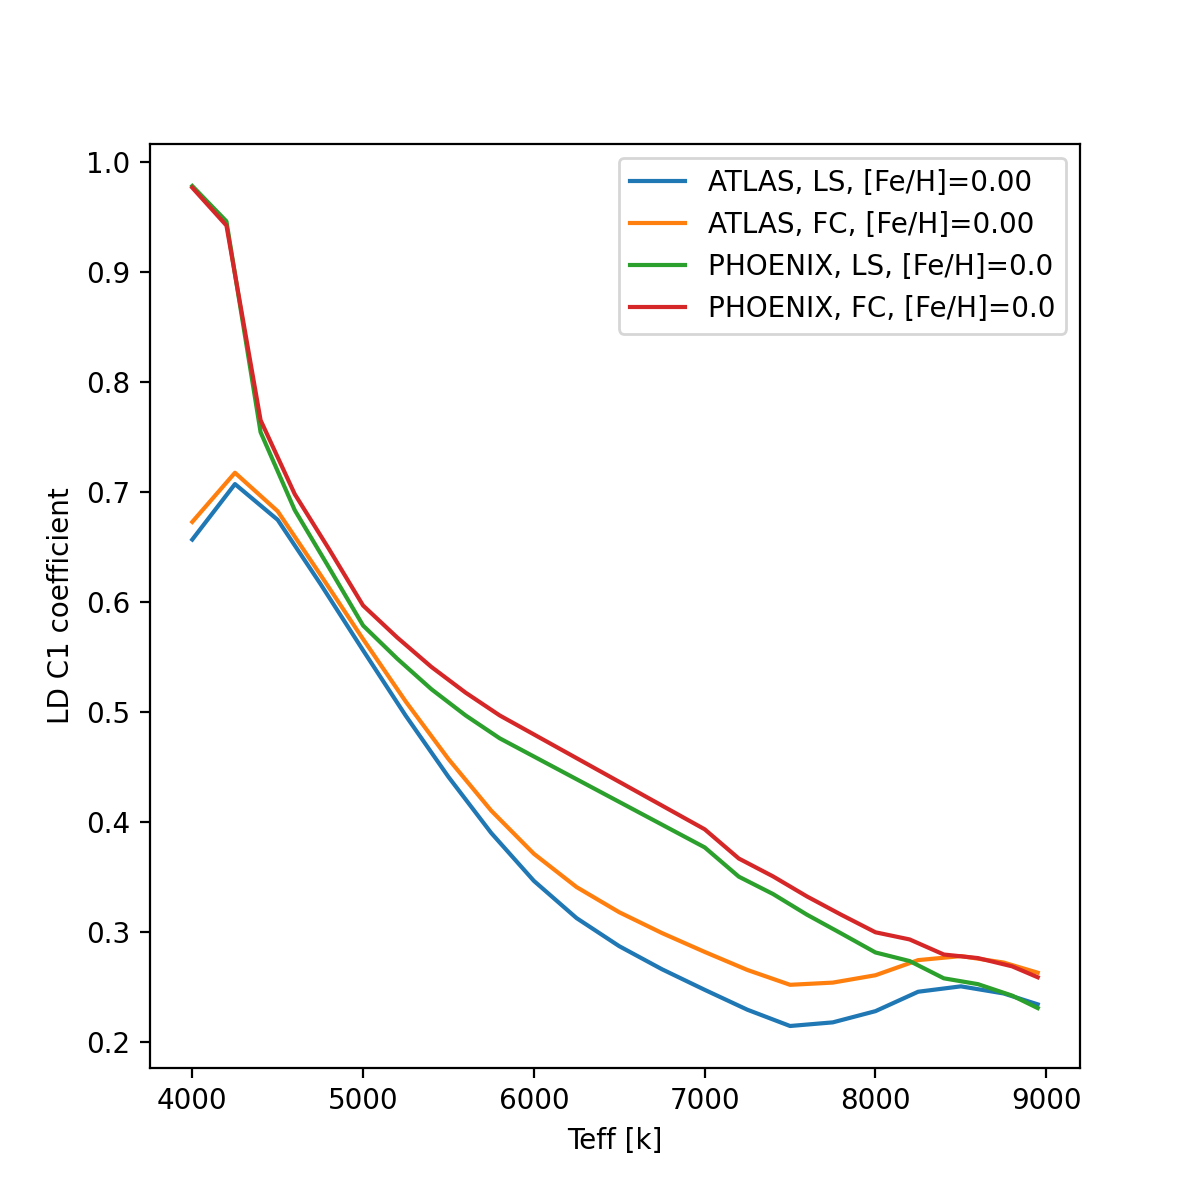

In [7]:
teff_curve = np.arange(4000,9000,50)
c1_atlas_ls = c1_function_atlas_ls(star_gfeh[0], teff_curve)
c1_atlas_fc = c1_function_atlas_fc(star_gfeh[0], teff_curve)


c1_phoenix_ls = c1_function_phoenix_ls(teff_curve)
c1_phoenix_fc = c1_function_phoenix_fc(teff_curve)

plt.figure(figsize=(6,6))
plt.plot(teff_curve, c1_atlas_ls, c='C0', linestyle='-', label='ATLAS, LS, [Fe/H]={0:.2f}'.format(star_gfeh[0]))
plt.plot(teff_curve, c1_atlas_fc, c='C1', linestyle='-', label='ATLAS, FC, [Fe/H]={0:.2f}'.format(star_gfeh[0]))


plt.plot(teff_curve, c1_phoenix_ls, c='C2', linestyle='-', label='PHOENIX, LS, [Fe/H]=0.0')
plt.plot(teff_curve, c1_phoenix_fc, c='C3', linestyle='-', label='PHOENIX, FC, [Fe/H]=0.0')

plt.ylabel('LD C1 coefficient')
plt.xlabel('Teff [k]')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


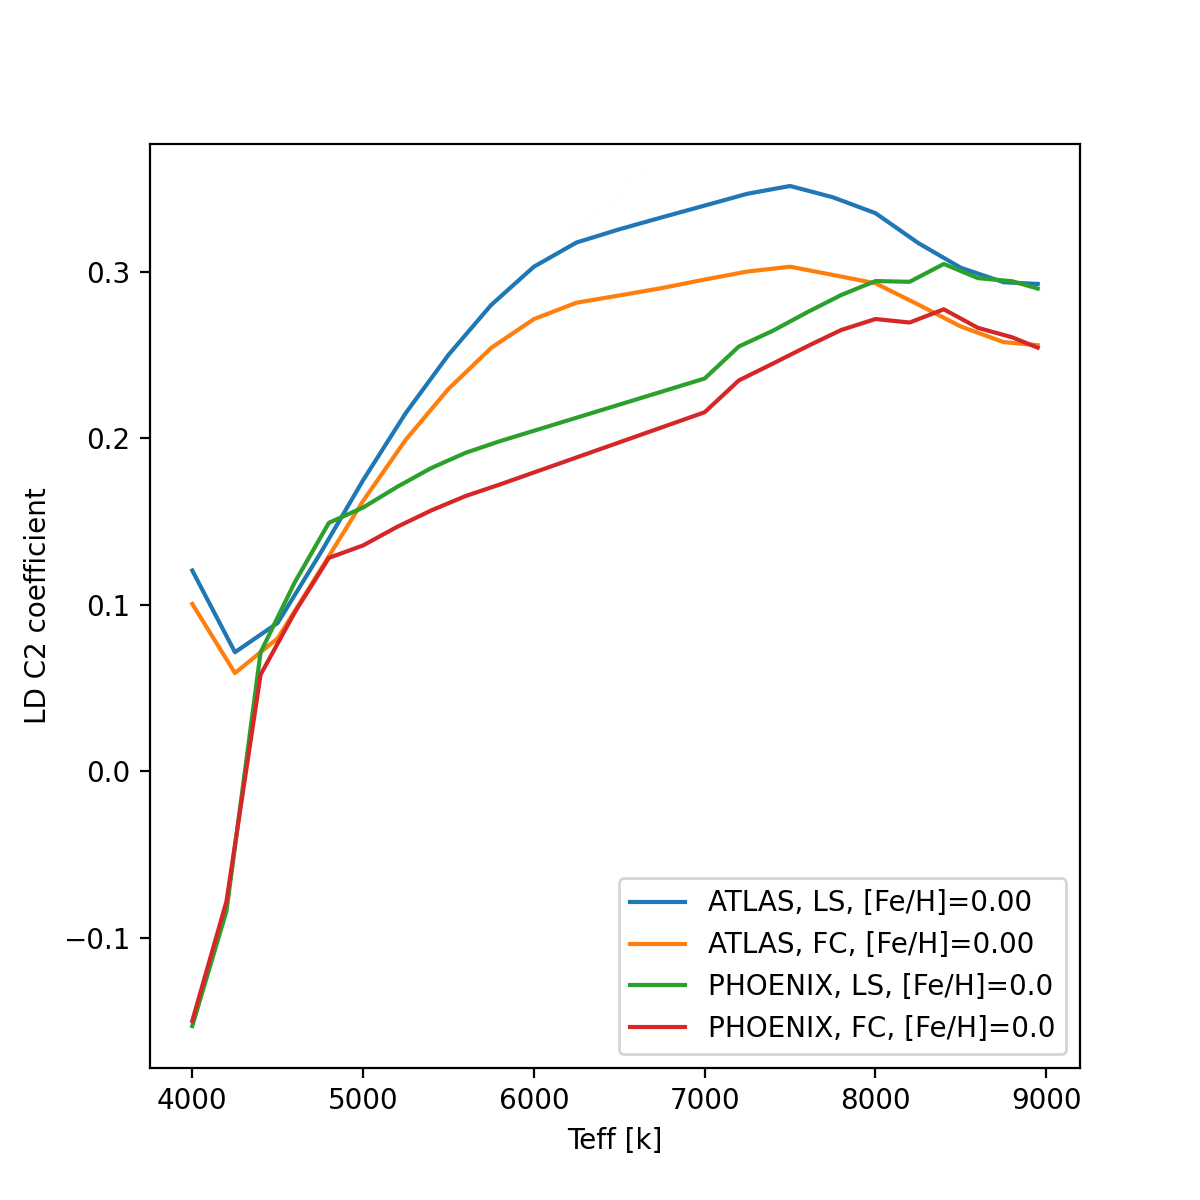

In [8]:
teff_curve = np.arange(4000,9000,50)
c2_atlas_ls = c2_function_atlas_ls(star_gfeh[0], teff_curve)
c2_atlas_fc = c2_function_atlas_fc(star_gfeh[0], teff_curve)


c2_phoenix_ls = c2_function_phoenix_ls(teff_curve)
c2_phoenix_fc = c2_function_phoenix_fc(teff_curve)

plt.figure(figsize=(6,6))
plt.plot(teff_curve, c2_atlas_ls, c='C0', linestyle='-', label='ATLAS, LS, [Fe/H]={0:.2f}'.format(star_gfeh[0]))
plt.plot(teff_curve, c2_atlas_fc, c='C1', linestyle='-', label='ATLAS, FC, [Fe/H]={0:.2f}'.format(star_gfeh[0]))


plt.plot(teff_curve, c2_phoenix_ls, c='C2', linestyle='-', label='PHOENIX, LS, [Fe/H]=0.0')
plt.plot(teff_curve, c2_phoenix_fc, c='C3', linestyle='-', label='PHOENIX, FC, [Fe/H]=0.0')

plt.ylabel('LD C2 coefficient')
plt.xlabel('Teff [k]')
plt.legend()
plt.show()

In [9]:
# Let'r try again with a lot more of samples
n_sample = 100000  # start small (1000) and increase the number while execution time is still acceptable
teff_dist = np.random.normal(star_teff[0], star_teff[1], n_sample)
logg_dist = np.random.normal(star_logg[0], star_logg[1], n_sample)
gfeh_dist = np.random.normal(star_gfeh[0], star_gfeh[1], n_sample)

# let's do it the slow - but safe - way
c1_dist_atlas_ls = np.zeros(n_sample)
c2_dist_atlas_ls = np.zeros(n_sample)

c1_dist_atlas_fc = np.zeros(n_sample)
c2_dist_atlas_fc = np.zeros(n_sample)

c1_dist_phoenix_ls = np.zeros(n_sample)
c2_dist_phoenix_ls = np.zeros(n_sample)
c1_dist_phoenix_fc = np.zeros(n_sample)
c2_dist_phoenix_fc = np.zeros(n_sample)

for ii in range(0, n_sample):
    c1_dist_atlas_ls[ii] = c1_function_atlas_ls(gfeh_dist[ii], teff_dist[ii])
    c2_dist_atlas_ls[ii] = c2_function_atlas_ls(gfeh_dist[ii], teff_dist[ii])
    c1_dist_atlas_fc[ii] = c1_function_atlas_fc(gfeh_dist[ii], teff_dist[ii])
    c2_dist_atlas_fc[ii] = c2_function_atlas_fc(gfeh_dist[ii], teff_dist[ii])
    

    c1_dist_phoenix_ls[ii] = c1_function_phoenix_ls(teff_dist[ii])
    c2_dist_phoenix_ls[ii] = c2_function_phoenix_ls(teff_dist[ii])
    c1_dist_phoenix_fc[ii] = c1_function_phoenix_fc(teff_dist[ii])
    c2_dist_phoenix_fc[ii] = c2_function_phoenix_fc(teff_dist[ii])
    
    

number of samples: 100000   shape of the array: (100000,)



<IPython.core.display.Javascript object>


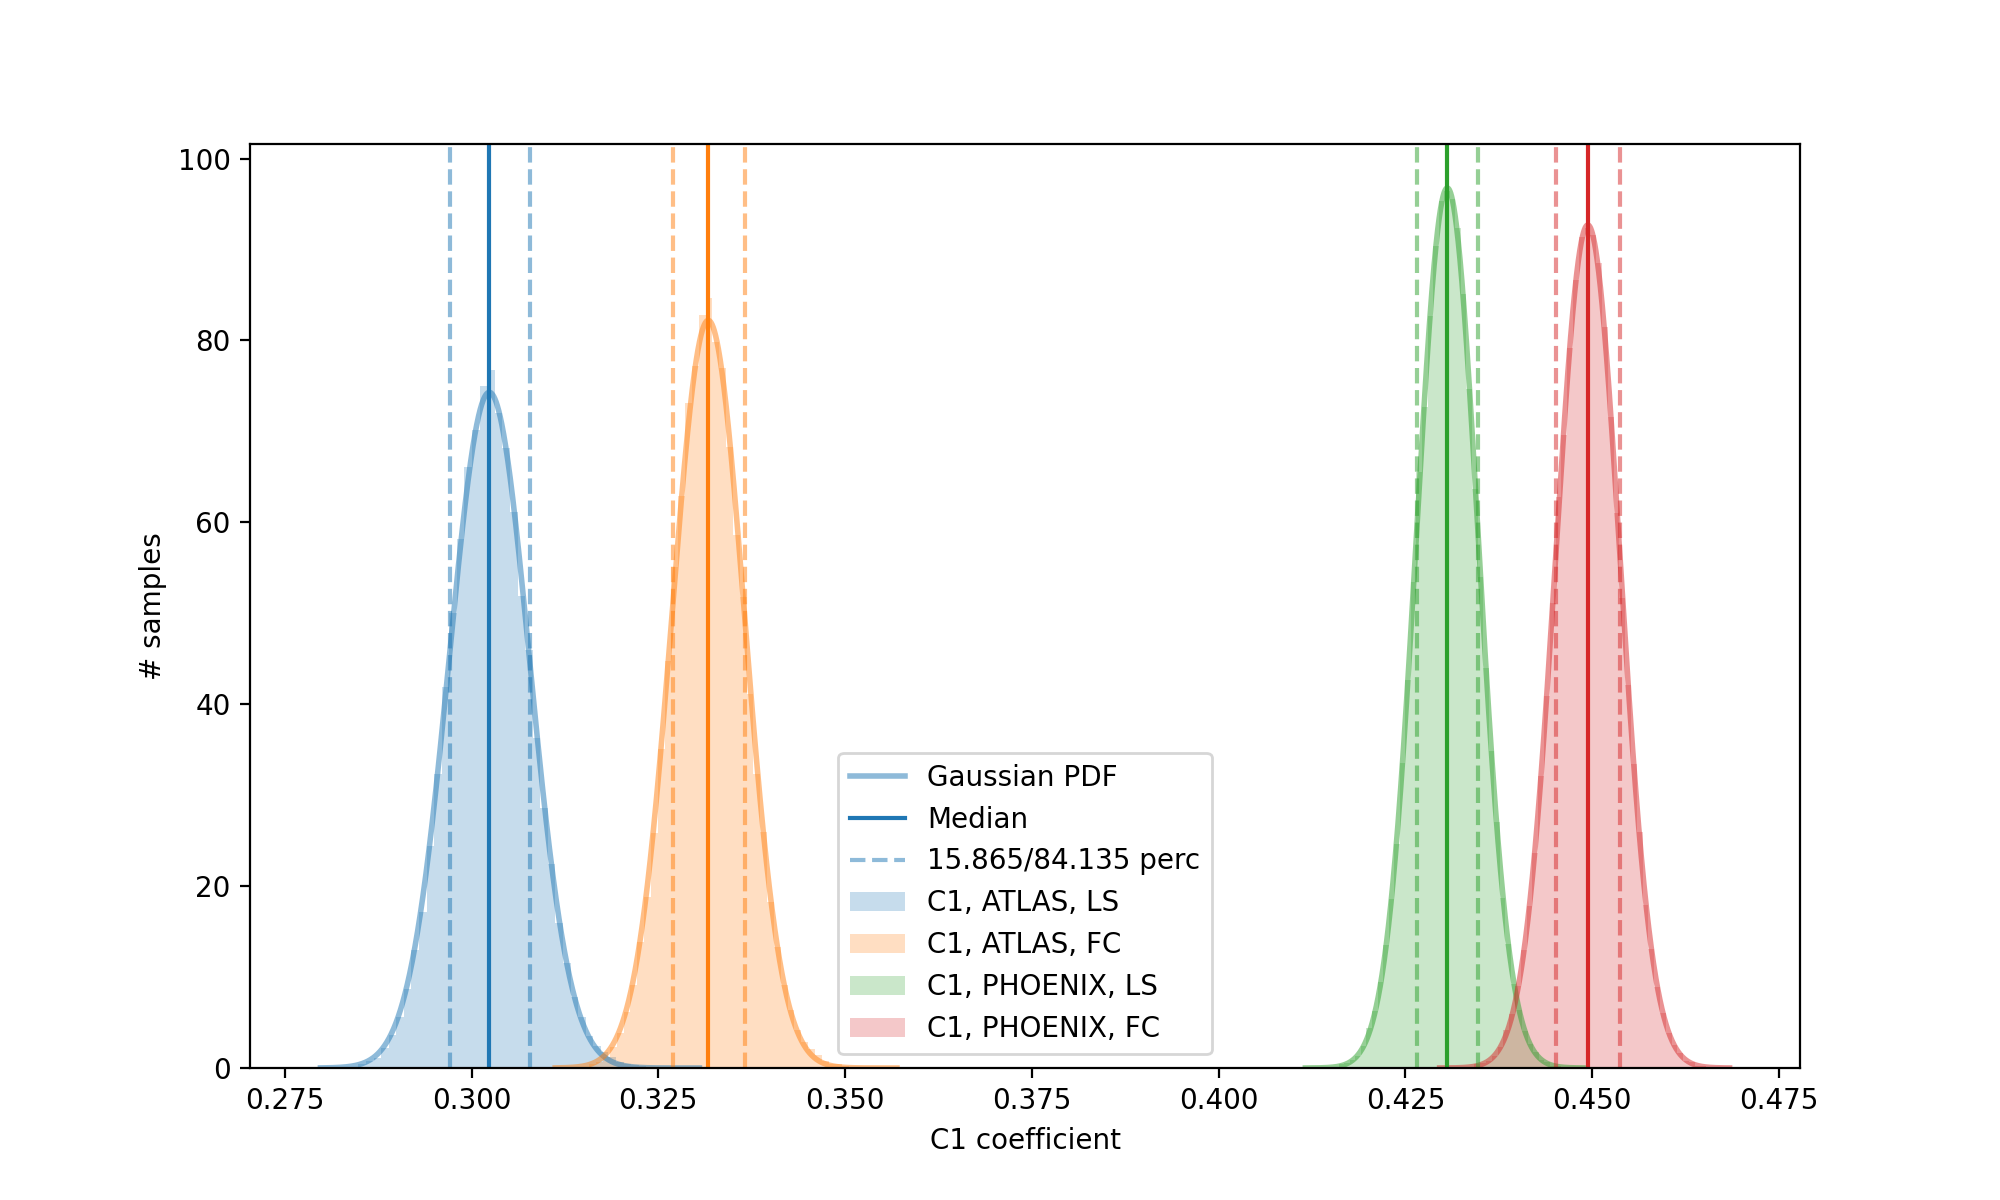

In [15]:
print('number of samples:',len(c1_dist_atlas_fc),'  shape of the array:', c1_dist_atlas_fc.shape)

print()


c1_atlas_ls_average = np.average(c1_dist_atlas_ls) # average
c1_atlas_ls_median = np.median(c1_dist_atlas_ls)   # median
c1_atlas_ls_std = np.std(c1_dist_atlas_ls)         # standard deviation
c1_atlas_ls_minus1sigma_perc = np.percentile(c1_dist_atlas_ls, 15.865)
c1_atlas_ls_plus1sigma_perc = np.percentile(c1_dist_atlas_ls, 84.135)


c1_atlas_fc_average = np.average(c1_dist_atlas_fc) # average
c1_atlas_fc_median = np.median(c1_dist_atlas_fc)   # median
c1_atlas_fc_std = np.std(c1_dist_atlas_fc)         # standard deviation
c1_atlas_fc_minus1sigma_perc = np.percentile(c1_dist_atlas_fc, 15.865)
c1_atlas_fc_plus1sigma_perc = np.percentile(c1_dist_atlas_fc, 84.135)


c1_phoenix_ls_average = np.average(c1_dist_phoenix_ls) # average
c1_phoenix_ls_median = np.median(c1_dist_phoenix_ls)   # median
c1_phoenix_ls_std = np.std(c1_dist_phoenix_ls)         # standard deviation
c1_phoenix_ls_minus1sigma_perc = np.percentile(c1_dist_phoenix_ls, 15.865)
c1_phoenix_ls_plus1sigma_perc = np.percentile(c1_dist_phoenix_ls, 84.135)


c1_phoenix_fc_average = np.average(c1_dist_phoenix_fc) # average
c1_phoenix_fc_median = np.median(c1_dist_phoenix_fc)   # median
c1_phoenix_fc_std = np.std(c1_dist_phoenix_fc)         # standard deviation
c1_phoenix_fc_minus1sigma_perc = np.percentile(c1_dist_phoenix_fc, 15.865)
c1_phoenix_fc_plus1sigma_perc = np.percentile(c1_dist_phoenix_fc, 84.135)


# plt.hist will make an histogram, but it only accepts 1D arrays
# third output is something we don't need, so we use _
plt.figure(figsize=(10,6))
count, bins, _ = plt.hist(c1_dist_atlas_ls, 50, density=True, label='C1, ATLAS, LS', alpha=0.25, color='C0')

x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c1_atlas_ls_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c1_atlas_ls_median)**2 / (2 *  c1_atlas_ls_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2, label='Gaussian PDF',  color='C0', alpha=0.5)

count, bins, _ = plt.hist(c1_dist_atlas_fc, 50, density=True, label='C1, ATLAS, FC', alpha=0.25, color='C1')
x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c1_atlas_fc_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c1_atlas_fc_median)**2 / (2 *  c1_atlas_fc_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C1', alpha=0.5)


plt.axvline(c1_atlas_ls_median,  c='C0', label='Median')
plt.axvline(c1_atlas_ls_minus1sigma_perc, alpha=0.5, c='C0', linestyle='--', label='15.865/84.135 perc')
plt.axvline(c1_atlas_ls_plus1sigma_perc , alpha=0.5, c='C0', linestyle='--')


plt.axvline(c1_atlas_fc_median,  c='C1')
plt.axvline(c1_atlas_fc_minus1sigma_perc, alpha=0.5, c='C1', linestyle='--')
plt.axvline(c1_atlas_fc_plus1sigma_perc , alpha=0.5, c='C1', linestyle='--')


count, bins, _ = plt.hist(c1_dist_phoenix_ls, 50, density=True, label='C1, PHOENIX, LS', alpha=0.25, color='C2')


x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c1_phoenix_ls_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c1_phoenix_ls_median)**2 / (2 *  c1_phoenix_ls_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C2', alpha=0.5)

count, bins, _ = plt.hist(c1_dist_phoenix_fc, 50, density=True, label='C1, PHOENIX, FC', alpha=0.25, color='C3')


x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c1_phoenix_fc_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c1_phoenix_fc_median)**2 / (2 *  c1_phoenix_fc_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C3', alpha=0.5)


plt.axvline(c1_phoenix_ls_median,  c='C2')
plt.axvline(c1_phoenix_ls_minus1sigma_perc, alpha=0.5, c='C2', linestyle='--')
plt.axvline(c1_phoenix_ls_plus1sigma_perc , alpha=0.5, c='C2', linestyle='--')


plt.axvline(c1_phoenix_fc_median,  c='C3')
plt.axvline(c1_phoenix_fc_minus1sigma_perc, alpha=0.5, c='C3', linestyle='--')
plt.axvline(c1_phoenix_fc_plus1sigma_perc , alpha=0.5, c='C3', linestyle='--')




plt.xlabel('C1 coefficient')
plt.ylabel('# samples')
plt.legend()
plt.show()



number of samples: 100000   shape of the array: (100000,)



<IPython.core.display.Javascript object>


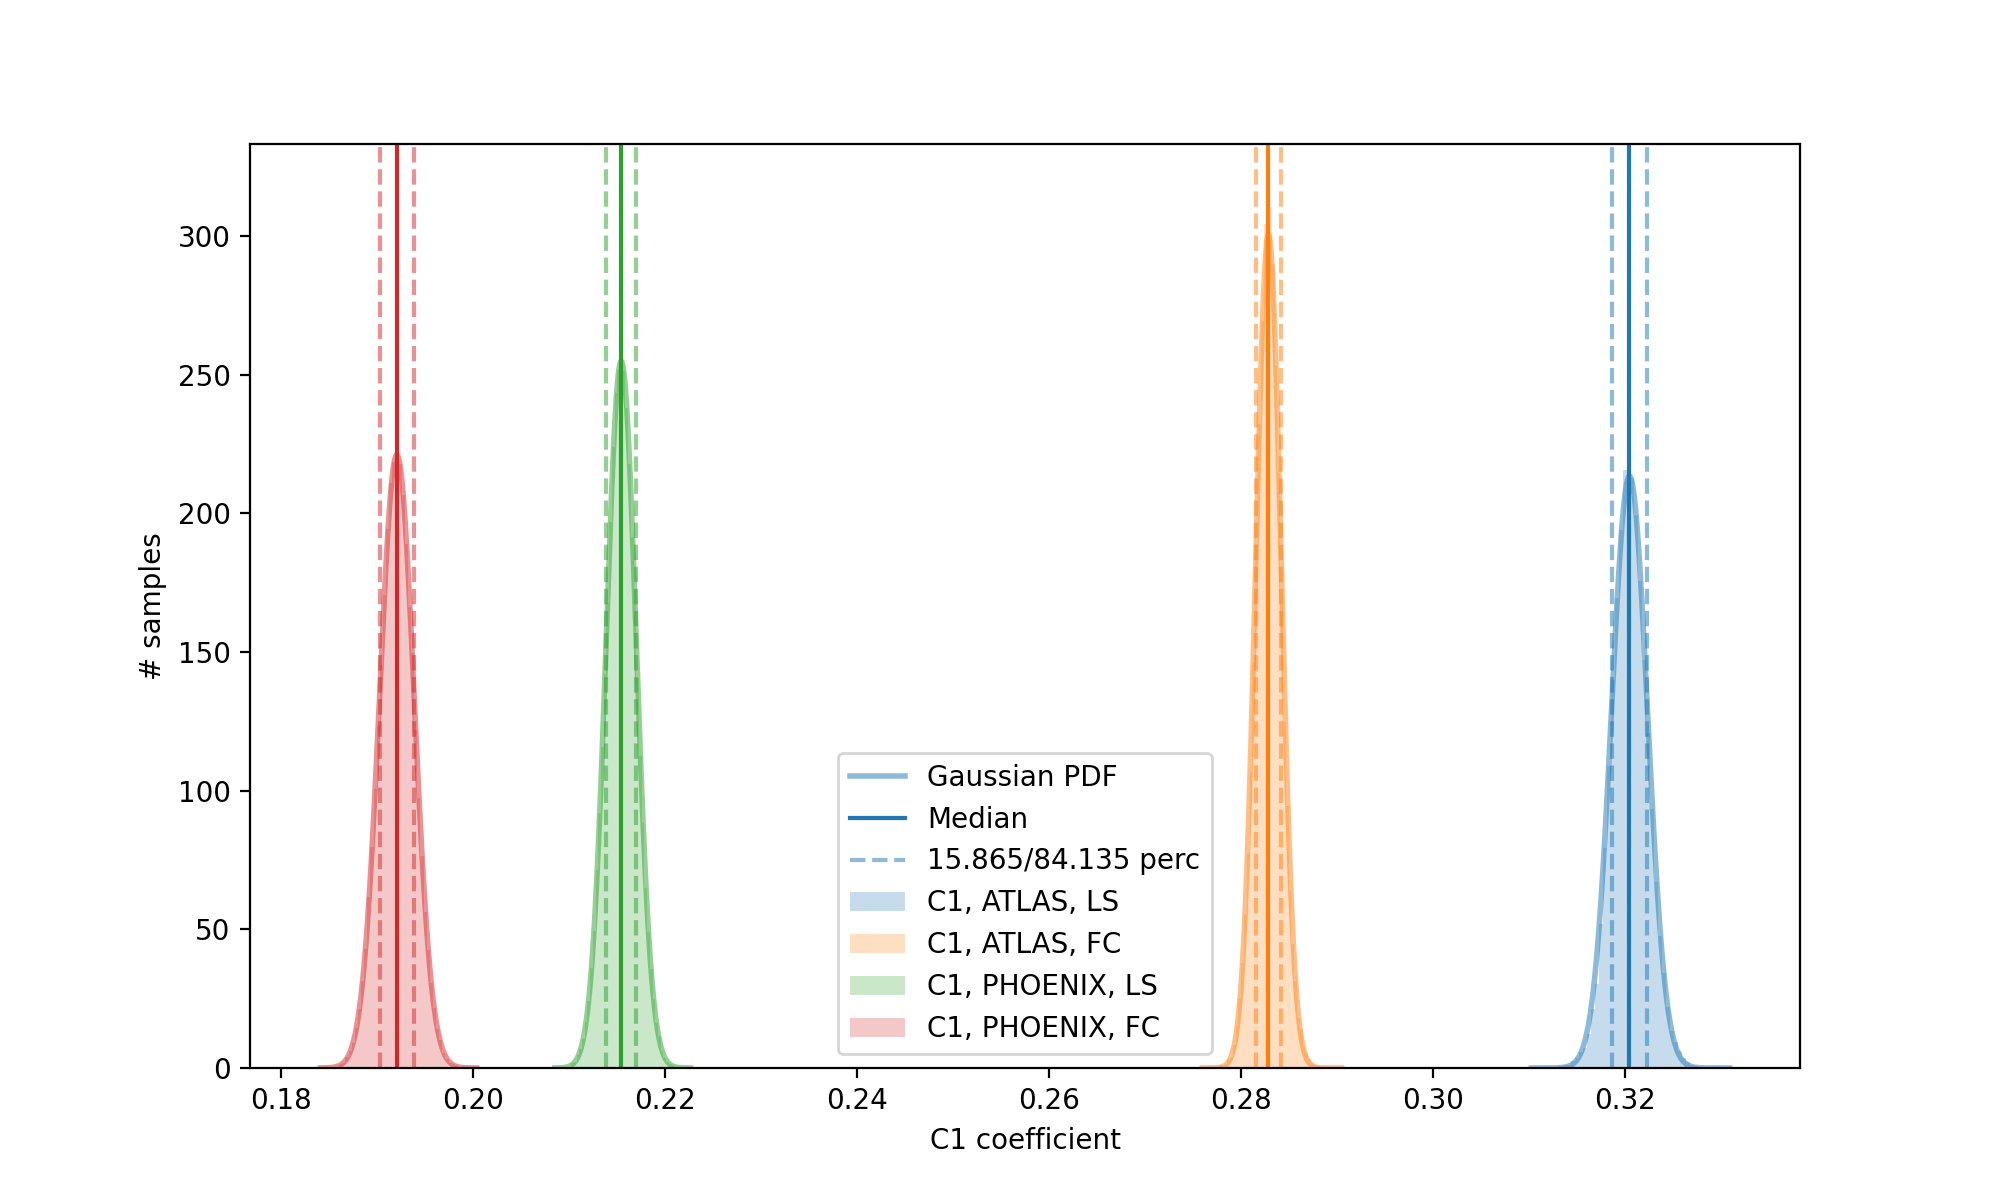

In [16]:
print('number of samples:',len(c2_dist_atlas_fc),'  shape of the array:', c2_dist_atlas_fc.shape)

print()


c2_atlas_ls_average = np.average(c2_dist_atlas_ls) # average
c2_atlas_ls_median = np.median(c2_dist_atlas_ls)   # median
c2_atlas_ls_std = np.std(c2_dist_atlas_ls)         # standard deviation
c2_atlas_ls_minus1sigma_perc = np.percentile(c2_dist_atlas_ls, 15.865)
c2_atlas_ls_plus1sigma_perc = np.percentile(c2_dist_atlas_ls, 84.135)


c2_atlas_fc_average = np.average(c2_dist_atlas_fc) # average
c2_atlas_fc_median = np.median(c2_dist_atlas_fc)   # median
c2_atlas_fc_std = np.std(c2_dist_atlas_fc)         # standard deviation
c2_atlas_fc_minus1sigma_perc = np.percentile(c2_dist_atlas_fc, 15.865)
c2_atlas_fc_plus1sigma_perc = np.percentile(c2_dist_atlas_fc, 84.135)


c2_phoenix_ls_average = np.average(c2_dist_phoenix_ls) # average
c2_phoenix_ls_median = np.median(c2_dist_phoenix_ls)   # median
c2_phoenix_ls_std = np.std(c2_dist_phoenix_ls)         # standard deviation
c2_phoenix_ls_minus1sigma_perc = np.percentile(c2_dist_phoenix_ls, 15.865)
c2_phoenix_ls_plus1sigma_perc = np.percentile(c2_dist_phoenix_ls, 84.135)


c2_phoenix_fc_average = np.average(c2_dist_phoenix_fc) # average
c2_phoenix_fc_median = np.median(c2_dist_phoenix_fc)   # median
c2_phoenix_fc_std = np.std(c2_dist_phoenix_fc)         # standard deviation
c2_phoenix_fc_minus1sigma_perc = np.percentile(c2_dist_phoenix_fc, 15.865)
c2_phoenix_fc_plus1sigma_perc = np.percentile(c2_dist_phoenix_fc, 84.135)


# plt.hist will make an histogram, but it only accepts 1D arrays
# third output is something we don't need, so we use _
plt.figure(figsize=(10,6))
count, bins, _ = plt.hist(c2_dist_atlas_ls, 50, density=True, label='C1, ATLAS, LS', alpha=0.25, color='C0')

x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c2_atlas_ls_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c2_atlas_ls_median)**2 / (2 *  c2_atlas_ls_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2, label='Gaussian PDF',  color='C0', alpha=0.5)

count, bins, _ = plt.hist(c2_dist_atlas_fc, 50, density=True, label='C1, ATLAS, FC', alpha=0.25, color='C1')
x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c2_atlas_fc_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c2_atlas_fc_median)**2 / (2 *  c2_atlas_fc_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C1', alpha=0.5)


plt.axvline(c2_atlas_ls_median,  c='C0', label='Median')
plt.axvline(c2_atlas_ls_minus1sigma_perc, alpha=0.5, c='C0', linestyle='--', label='15.865/84.135 perc')
plt.axvline(c2_atlas_ls_plus1sigma_perc , alpha=0.5, c='C0', linestyle='--')


plt.axvline(c2_atlas_fc_median,  c='C1')
plt.axvline(c2_atlas_fc_minus1sigma_perc, alpha=0.5, c='C1', linestyle='--')
plt.axvline(c2_atlas_fc_plus1sigma_perc , alpha=0.5, c='C1', linestyle='--')


count, bins, _ = plt.hist(c2_dist_phoenix_ls, 50, density=True, label='C1, PHOENIX, LS', alpha=0.25, color='C2')


x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c2_phoenix_ls_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c2_phoenix_ls_median)**2 / (2 *  c2_phoenix_ls_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C2', alpha=0.5)

count, bins, _ = plt.hist(c2_dist_phoenix_fc, 50, density=True, label='C1, PHOENIX, FC', alpha=0.25, color='C3')


x_gauss = np.linspace(bins[0], bins[-1], 1000)
y_gauss = 1/( c2_phoenix_fc_std * np.sqrt(2 * np.pi)) * np.exp( - (x_gauss - c2_phoenix_fc_median)**2 / (2 *  c2_phoenix_fc_std**2) )
plt.plot(x_gauss, y_gauss, linewidth=2,  color='C3', alpha=0.5)


plt.axvline(c2_phoenix_ls_median,  c='C2')
plt.axvline(c2_phoenix_ls_minus1sigma_perc, alpha=0.5, c='C2', linestyle='--')
plt.axvline(c2_phoenix_ls_plus1sigma_perc , alpha=0.5, c='C2', linestyle='--')


plt.axvline(c2_phoenix_fc_median,  c='C3')
plt.axvline(c2_phoenix_fc_minus1sigma_perc, alpha=0.5, c='C3', linestyle='--')
plt.axvline(c2_phoenix_fc_plus1sigma_perc , alpha=0.5, c='C3', linestyle='--')




plt.xlabel('C1 coefficient')
plt.ylabel('# samples')
plt.legend()
plt.show()

